# Try Pix2pix

## 下載github https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [16]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...


## 安裝需求套件

!cd pytorch-CycleGAN-and-pix2pix 

!pip install -r requirements.txt

## 下載數據集 [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]

https://people.eecs.berkeley.edu/~tinghuiz/projects/pix2pix/datasets/

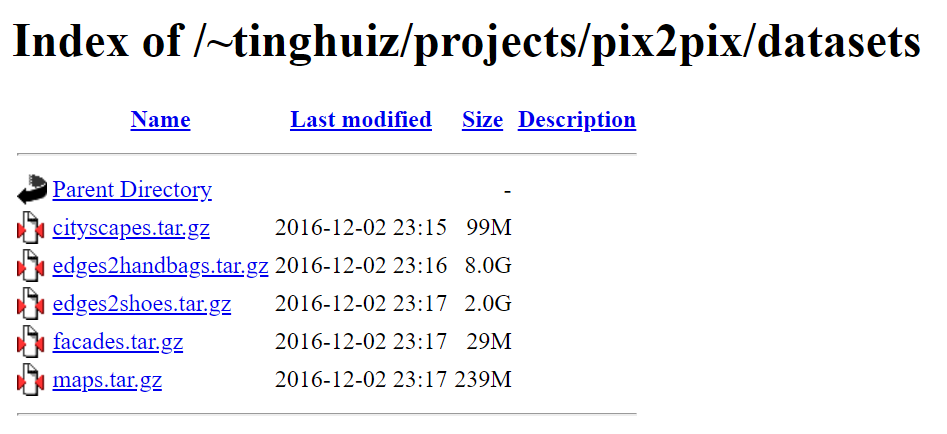

## 下載預訓練模型

1. 下載 http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/
2. 在 script 資料夾中創建 checkpoint\edges2shoes_pretrained
3. 更名為 latest_net_G.pth

In [29]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix')
!dir

 磁碟區 C 中的磁碟是 BOOTCAMP
 磁碟區序號:  1E90-A06E

 C:\Users\chiachun-win\Desktop\Cave\Article\10909_GAN\pix2pix\pytorch-CycleGAN-and-pix2pix 的目錄

2020/09/07  下午 05:00    <DIR>          .
2020/09/07  下午 05:00    <DIR>          ..
2020/09/07  下午 04:44               789 .gitignore
2020/09/07  下午 04:44               796 .replit
2020/09/07  下午 04:44             8,719 CycleGAN.ipynb
2020/09/07  下午 04:44    <DIR>          data
2020/09/07  下午 05:00    <DIR>          datasets
2020/09/07  下午 04:44    <DIR>          docs
2020/09/07  下午 04:44               235 environment.yml
2020/09/07  下午 04:44    <DIR>          imgs
2020/09/07  下午 04:44             3,623 LICENSE
2020/09/07  下午 04:44    <DIR>          models
2020/09/07  下午 04:44    <DIR>          options
2020/09/07  下午 04:44             7,727 pix2pix.ipynb
2020/09/07  下午 04:44            15,968 README.md
2020/09/07  下午 04:44                68 requirements.txt
2020/09/07  下午 05:03    <DIR>          scripts
2020/09/07  下午 04:44             4,222 test.py
2

In [33]:
!python test.py --dataroot ./datasets/edges2shoes --direction AtoB --model pix2pix --name \edges2shoes_pretrained

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/edges2shoes        	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

Traceback (most recent call last):
  File "test.py", line 46, in <module>
    model = create_model(opt)      # create a model given opt.model and other options
  File "C:\Users\chiachun-win\Desktop\Cave\Article\10909_GAN\pix2pix\pytorch-CycleGAN-and-pix2pix\models\__init__.py", line 65, in create_model
    instance = model(opt)
  File "C:\Users\chiachun-win\Desktop\Cave\Article\10909_GAN\pix2pix\pytorch-CycleGAN-and-pix2pix\models\pix2pix_model.py", line 57, in __init__
    not opt.no_dropout, opt.init_type, opt.init_gain, self.gpu_ids)
  File "C:\Users\chiachun-win\Desktop\Cave\Article\10909_GAN\pix2pix\pytorch-CycleGAN-and-pix2pix\models\networks.py", line 159, in define_G
    return init_net(net, init_type, init_gain, gpu_ids)
  File "C:\Users\chiachun-win\Desktop\Cave\Article\10909_GAN\pix2pix\pytorch-CycleGAN-and-pix2pix\models\networks.py", line 112, in init_net
    assert(torch.cuda.is_available())
AssertionError


# PyQt5 手繪板 : New version
Ctrl + s Save ;
Ctrl + q Exit ;
Ctrl + c Clear ;

In [15]:
#%%

# importing libraries 
from PyQt5 import QtWidgets
from PyQt5.QtWidgets import * 
from PyQt5.QtGui import * 
from PyQt5.QtCore import * 
import sys 
import cv2
import numpy as np
  
class Window(QMainWindow): 
    def __init__(self, canvas_size=256, brush_size=5): 
        super().__init__() 
  
        # 設定標題
        self.setWindowTitle("Paint with PyQt5") 

        # 設定視窗的位置
        merge = 40
        size = canvas_size - merge
        self.setGeometry(merge, merge, size, size) 
  
        # 創造一個全白的圖片
        self.image = QImage(self.size(), QImage.Format_RGB32) 
        self.image.fill(Qt.white) 
  
        # 確認是否在畫圖
        self.drawing = False
        # 定義筆刷大小跟顏色 
        self.brushSize = brush_size
        self.brushColor = Qt.black 
  
        # 最終最後的位置 
        self.lastPoint = QPoint() 
  
        # 創建菜單，為了綁定功能 
        mainMenu = self.menuBar() 
        fileMenu = mainMenu.addMenu("File") 
        
        # 儲存圖片：實例化功能、新增快捷鍵、加入菜單跟綁定動作
        saveAction = QAction("Save", self) 
        saveAction.setShortcut(QKeySequence('Ctrl+s'))
        fileMenu.addAction(saveAction)
        saveAction.triggered.connect(self.save) 
  
        # 清除畫布
        clearAction = QAction("Clear", self) 
        clearAction.setShortcut(QKeySequence('Ctrl+c')) 
        fileMenu.addAction(clearAction) 
        clearAction.triggered.connect(self.clear) 
        
        # 結束程式
        exitAction = QAction("Exit", self)
        exitAction.setShortcut(QKeySequence('Ctrl+q'))
        fileMenu.addAction(exitAction)
        exitAction.triggered.connect(self.exitapp)
  
    # 當滑鼠按下要執行的副函式
    def mousePressEvent(self, event): 
  
        # 確認左鍵是否按下
        if event.button() == Qt.LeftButton: 
            
            # 紀錄按下的位置
            self.drawing = True
            self.lastPoint = event.pos() 
  
    # 當滑鼠移動要執行的副函式 
    def mouseMoveEvent(self, event): 
          
        # 當移動的是左鍵並且drawing==True也就是按下的狀態
        if (event.buttons() & Qt.LeftButton) & self.drawing: 
              
            # 實例化畫布並且設定筆刷
            painter = QPainter(self.image) 
            painter.setPen(QPen(self.brushColor, self.brushSize,  
                            Qt.SolidLine, Qt.RoundCap, Qt.RoundJoin)) 
              
            # 從剛剛的位置畫一條線到現在的位置
            painter.drawLine(self.lastPoint, event.pos()) 
              
            # 更改最後的位置
            self.lastPoint = event.pos() 

            # 每畫一次就更新畫布
            self.update() 
  
    # 當左鍵放開
    def mouseReleaseEvent(self, event): 
  
        if event.button() == Qt.LeftButton: 
            # drawing=False的時候怎麼移動他也不會進去判斷式 
            self.drawing = False
  
    # 建立 painter 後還須建立畫圖的事件 
    def paintEvent(self, event): 

        # 建立畫布功能
        canvasPainter = QPainter(self) 
        # 將圖片畫上去 
        canvasPainter.drawImage(self.rect(), self.image, self.image.rect()) 
   
    # 清除畫布
    def clear(self): 
        
        self.image.fill(Qt.white)
        self.update() 
    
    # 離開視窗
    def exitapp(self):
        self.close()

    # 讓畫的圖符合訓練資料
    def initImage(self, filepath):

        trg_size = 256

        new_img = np.zeros([256,512,3], dtype=np.uint8)

        new_img.fill(255)

        org_img = cv2.imread('{}'.format(filepath))
        src_img = cv2.resize(org_img, (trg_size, trg_size) )

        print('org_img {} > src_img {}'.format(org_img.shape, src_img.shape))

        for h in range(trg_size):
            for w in range(trg_size*2):
                if w< 256:
                    new_img[h][w] = src_img[h][w]
                else:
                    break

        cv2.imwrite(filepath, new_img)
        
        # 儲存畫布
    def save(self):
        filePath = r'C:\Article\pix2pix\pytorch-CycleGAN-and-pix2pix\datasets\edges2shoes\test\custom_edge.jpg'

        self.image.save(filePath) 
        self.initImage(filePath)
        print('save image: ', filePath)
        !python test.py --dataroot datasets\edges2shoes --model pix2pix --name edges2shoes_pretrained
        
        im = cv2.imread(r'C:\Article\pix2pix\pytorch-CycleGAN-and-pix2pix\results\edges2shoes_pretrained\test_latest\images\custom_edge_fake_B.png')
        cv2.imshow('result', im)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        self.close()     

# 實例化 app 這支程式
if not QtWidgets.QApplication.instance():
    app = QtWidgets.QApplication(sys.argv)
else:
    app = QtWidgets.QApplication.instance() 

# 獲得螢幕可使用範圍
screen = app.primaryScreen()
rect = screen.availableGeometry()
print('Available: %d x %d' % (rect.width(), rect.height()))

# 宣告畫布大小以及筆刷大小
canvas_size = rect.width() if rect.width() < rect.height() else rect.height()
brush_size = 10

# 實例化視窗
window = Window(canvas_size, brush_size) 
  
# 顯示視窗
window.show() 
  
# 執行 app
sys.exit(app.exec()) 

# %%


Screen: \\.\DISPLAY1
Size: 2560 x 1600
Available: 2560 x 1540


SystemExit: 0